We have been tasked to understand electric car usage by solving for a research questionfor the Autolib electric car-sharing service company. We will investigate a claim about the blue cars from the provided Autolib dataset.



In [2]:
#we import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math

In [3]:
#we read in our data and preview it

Autolib = pd.read_csv('/content/autolib_daily_events_postal_code.csv')
Autolib.head()
Autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [7]:
# we load our variable definitions
Variable_defintions = pd.read_excel('/content/columns_explanation.xlsx')
Variable_defintions

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [8]:
#we explore our data and get the number of rows and columns
print(Autolib.shape)

(16085, 13)


In [9]:
#we check for the data types in our dataset
Autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [10]:
#the date column data type is not appropriate so we convert it to date
Autolib['date'] = pd.to_datetime(Autolib['date'])


In [47]:
#we check the information on the variables in the data set
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

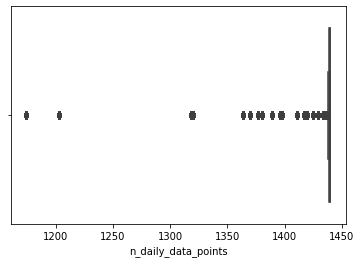

In [50]:
#we check the data for outliers 
sns.boxplot(x=Autolib['n_daily_data_points'])

There are 3 observations that seem to be outliers, 

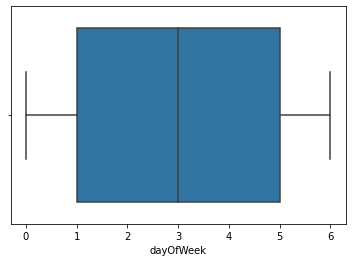

In [13]:
sns.boxplot(x=Autolib['dayOfWeek'])

As expected there ate no outliers with the day of week

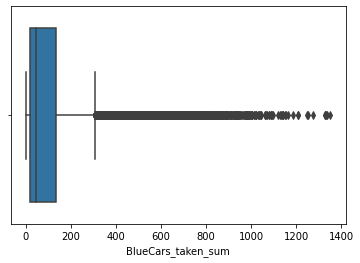

In [14]:
sns.boxplot(x=Autolib['BlueCars_taken_sum'])

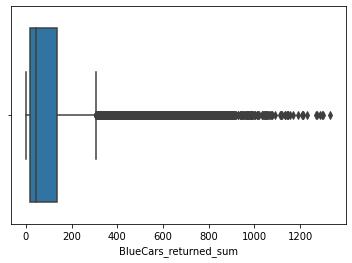

In [15]:
sns.boxplot(x=Autolib['BlueCars_returned_sum'])

There are no outliers 

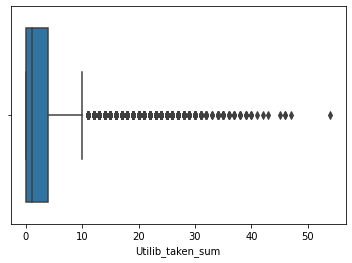

In [16]:
sns.boxplot(x=Autolib['Utilib_taken_sum'])

We have an observation beyond 50 that seems to be an outlier

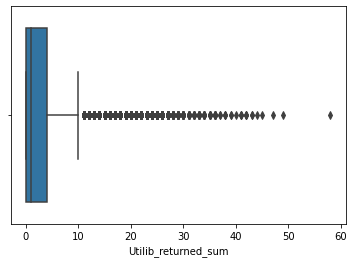

In [17]:
sns.boxplot(x=Autolib['Utilib_returned_sum'])

The same outlier exists in the Utilib returned so we will keeep it as an observation

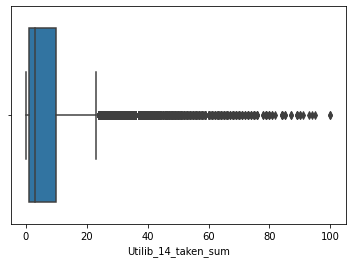

In [18]:
sns.boxplot(x=Autolib['Utilib_14_taken_sum'])

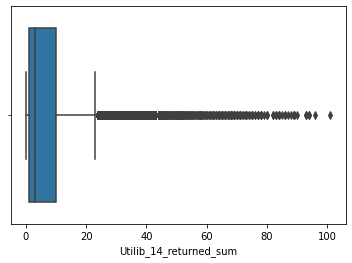

In [19]:
sns.boxplot(x=Autolib['Utilib_14_returned_sum'])

There are no outliers in utilib14 taken and returned

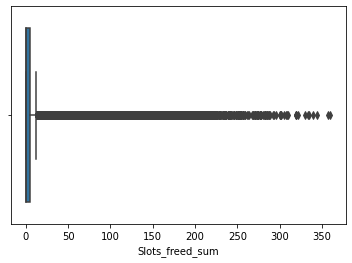

In [24]:
sns.boxplot(x=Autolib['Slots_freed_sum'])

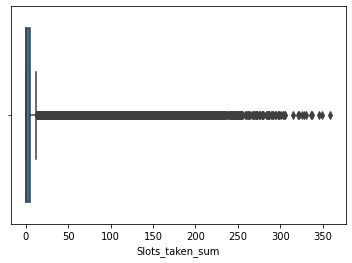

In [25]:
sns.boxplot(x=Autolib['Slots_taken_sum'])

There are no outliers on the slots freed and taken as well


The outliers where present don't seem significant, we will keep them all

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


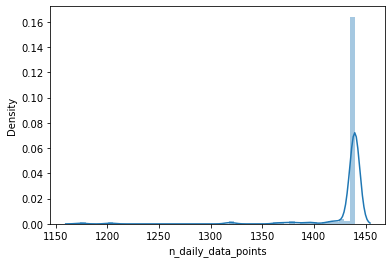

In [51]:
sns.distplot(Autolib.n_daily_data_points.dropna());

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


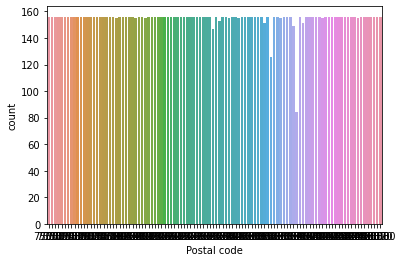

In [52]:
#we check the distribution of the values of the postal code
sns.countplot(Autolib['Postal code'].dropna())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


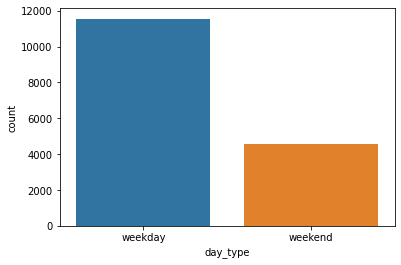

In [28]:
# we also check the distribution of the type of the day i.e. weekday or weekend
sns.countplot(Autolib['day_type'].dropna())

Majority if the days are weekdays as expected

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


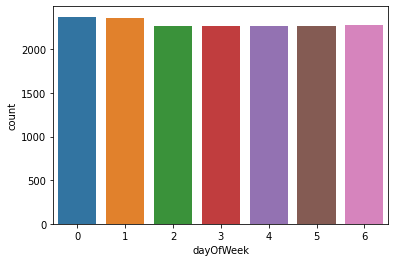

In [29]:
# we also check the distribution of the days of the week
sns.countplot(Autolib['dayOfWeek'].dropna())

Day 0 and 1 seem to have the most observations

In [30]:
Numerical_Columns = ['BlueCars_taken_sum' ,'BlueCars_returned_sum','Utilib_taken_sum','Utilib_returned_sum',
                'Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum']



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


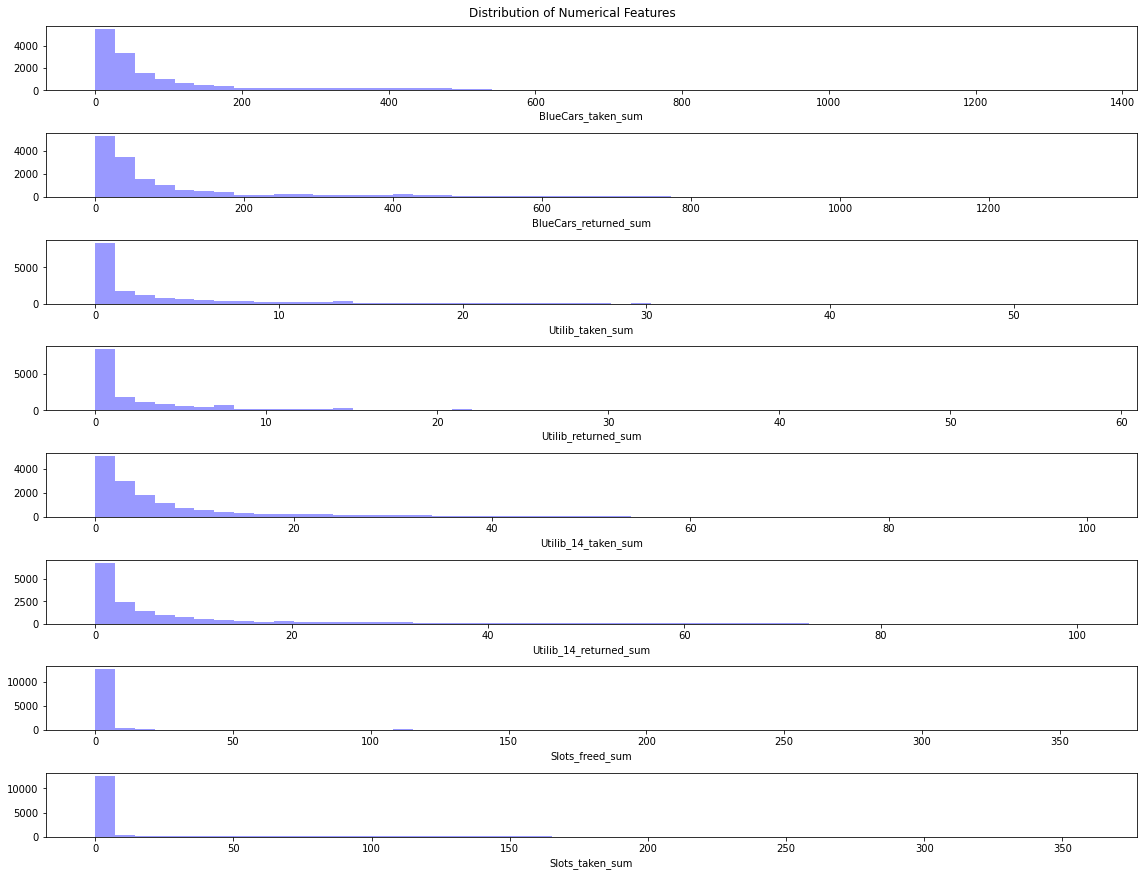

In [31]:
sns.set_style
fig, axes = plt.subplots(nrows=8, ncols = 1, figsize = (16, 12))
fig.suptitle('Distribution of Numerical Features', y= 1.01)

for ax, data, name in zip(axes.flatten(), Autolib, Numerical_Columns):
  sns.distplot(Autolib[name], ax = ax, kde = False, color = 'blue')
plt.tight_layout()

Multivariate analysis

The variables have positive skewness i.e. skewed to the right

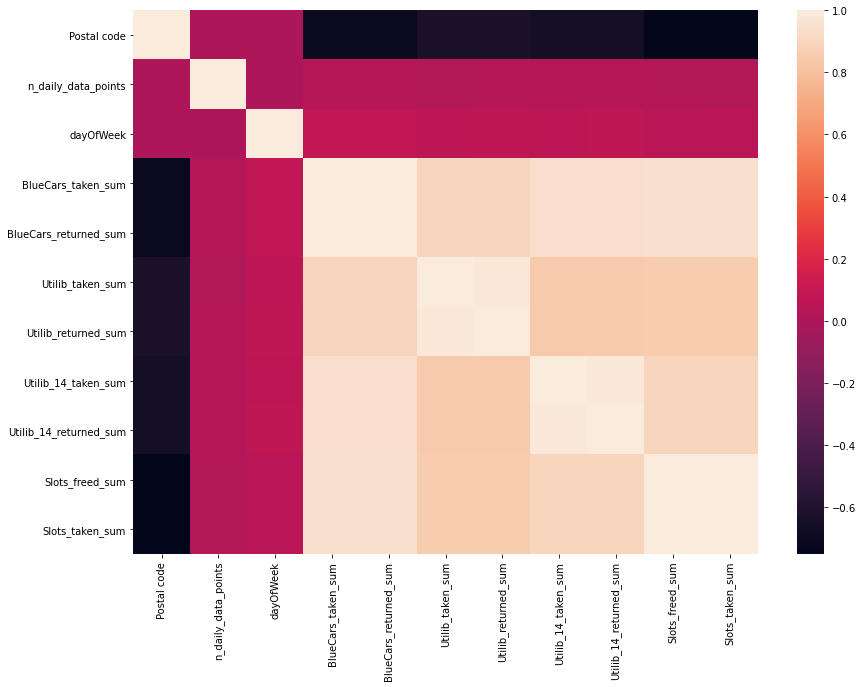

In [33]:
#We show the correlation of the different variables 
plt.figure(figsize=(14,10))
auto_corr = Autolib.corr()
sns.heatmap(auto_corr)

Text(0, 0.5, 'Number of cars')

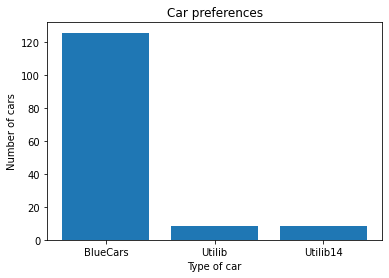

In [35]:
#we check if there if a preferred car

Cars = [Autolib.BlueCars_taken_sum.mean(),
        Autolib.Utilib_14_taken_sum.mean(),
        Autolib.Utilib_14_taken_sum.mean()]
Titles = ['BlueCars','Utilib','Utilib14']
plt.bar(Titles,Cars)
plt.title('Car preferences')
plt.xlabel('Type of car')
plt.ylabel('Number of cars')


We see that the blue cars are the most prefered


In [36]:
#We then investigate the number of blue cars returned to each postal code

Postal_Code_group = Autolib.groupby(pd.Grouper(('Postal code')))
Blue_Cars_returned = Postal_Code_group['BlueCars_taken_sum'].mean().sort_values(ascending=True)
Blue_Cars_returned

Postal code
93440      3.443709
93390      3.630952
93370      3.744966
94100      4.832258
93150      5.258278
            ...    
75019    525.467949
75013    541.596154
75017    734.493590
75016    790.301282
75015    896.955128
Name: BlueCars_taken_sum, Length: 104, dtype: float64

# **Hypothesis** **Testing**

We will answer the following research questions

1. On weekdays, is the number of Bluecars taken in postal code 75019 different from Bluecars taken from postal code 75013 ?

Hypothesis

Null Hypothesis: On weekdays,the number of Bluecars taken from postal code 75019 is the same as in postal code 75013.

 H0:m1 = m2

   

Alternative Hypothesis: On Weekdays, the number of Bluecars taken from postal code 75019 is not the same as in postal code 75013.

  Ha: m1 ≠ m2

2. During weekends,is the number of Bluecars taken in postal code 75019 different from Bluecars taken from postal code 75013?

Hypothesis

Null Hyothesis: On weekends,the number of Bluecars taken from postal code 75019 is the same as in postal code 75013 during weekends

  H0:U1 = U2
  

Alternative Hypothesis: On weekends,the number of Bluecars taken from postal code 75019 is not the same as in postal code 75013.
 
 Ha: U1 ≠ U2

   


***Metrics of Success***

A confidence level of 95% is used to test the hypothesis


In [57]:
# we get the data for question one

Blue_Cars_Weekdays = Autolib[Autolib['day_type']=='weekday']
Blue_Cars_Weekdays


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16078,95880,2018-06-13,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,2018-06-14,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,2018-06-15,1440,4,weekday,15,10,0,0,2,3,0,0
16083,95880,2018-06-18,1440,0,weekday,11,14,3,5,2,2,0,0


In [82]:
# we pick the relevenat postal codes

Postal_Codes_Blue_Cars_Weekdays = Blue_Cars_Weekdays[Blue_Cars_Weekdays['Postal code']== 75019 & 75013]
Postal_Codes_Blue_Cars_Weekdays



,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
1248,75009,2018-01-01,1440,0,weekday,336,336,7,8,21,20,72,70
1249,75009,2018-01-02,1438,1,weekday,266,258,4,5,12,12,44,45
1250,75009,2018-01-03,1439,2,weekday,324,309,8,6,15,16,58,54
1251,75009,2018-01-04,1320,3,weekday,335,335,8,11,15,13,54,59
1252,75009,2018-01-05,1440,4,weekday,378,360,9,7,25,26,77,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,75009,2018-06-13,1440,2,weekday,326,325,12,12,29,29,87,90
1398,75009,2018-06-14,1439,3,weekday,332,325,20,20,19,17,72,66
1399,75009,2018-06-15,1440,4,weekday,321,328,6,5,12,13,63,68
1402,75009,2018-06-18,1440,0,weekday,304,274,10,9,19,17,59,54


Text(0.5, 1.0, 'Distribution Normality')

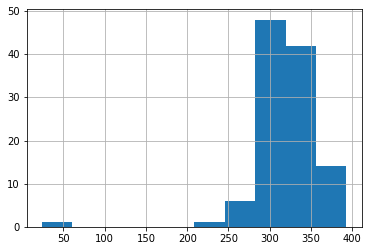

In [83]:
#we will use a Z test to check for normal distribution i.e. we check if our data is normally distributed
Blue_Cars_Weekdays_Checked = Postal_Codes_Blue_Cars_Weekdays['BlueCars_taken_sum'].sort_values(ascending =True)
Blue_Cars_Weekdays_Checked.hist()
plt.set_title("Distribution Normality")



314    6
319    5
345    4
284    4
327    3
      ..
328    1
326    1
325    1
378    1
259    1
Name: BlueCars_taken_sum, Length: 72, dtype: int64


Text(0, 0.5, 'Frequency')

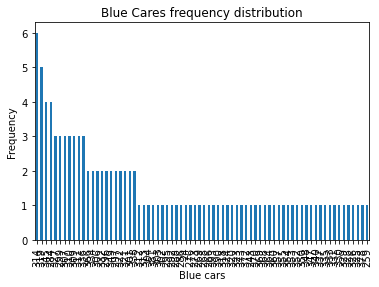

In [84]:
Blue_Cars_Weekdays_Checked_Frequency = Blue_Cars_Weekdays_Checked.value_counts(sort = True)
print(Blue_Cars_Weekdays_Checked_Frequency)
plt=Blue_Cars_Weekdays_Checked_Frequency.plot.bar()
plt.set_title("Blue Cares frequency distribution")
plt.set_xlabel("Blue cars")
plt.set_ylabel("Frequency")

our data is normally distributed 

In [87]:
#we now obtain the number of blue cars in our postal codes of interest during the weekday
Postal_Code_Cars_Mean = Postal_Codes_Blue_Cars_Weekdays.groupby('Postal code')['BlueCars_taken_sum'].sum().sort_values(ascending = True)
Postal_Code_Cars_Mean

Postal code
75009    35822
Name: BlueCars_taken_sum, dtype: int64

In [90]:
#Stratified sampling

df2 = Postal_Codes_Blue_Cars_Weekdays.groupby('Postal code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df2

# sample mean
sm= df2['BlueCars_taken_sum'].mean()
sm

# sample standard deviation
sd = df2['BlueCars_taken_sum'].std()
sd

#population mean
pm=df2['BlueCars_taken_sum'].mean()
pm

# calculating the z-score
zscore = (sm-pm) / sd
zscore

#calculating the p value
import scipy.stats as stats
from scipy.stats import norm
pvalue = stats.norm.cdf(zscore)
print(pvalue)

#interpretation of the p value
if pvalue < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

0.5
we fail to reject null hypothesis


In [91]:
# we get the data for question one

Blue_Cars_Weekend = Autolib[Autolib['day_type']=='weekend']
Blue_Cars_Weekend


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
5,75001,2018-01-06,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,2018-01-07,1440,6,weekend,180,180,2,2,10,9,34,34
12,75001,2018-01-13,1440,5,weekend,224,223,2,2,15,15,38,38
13,75001,2018-01-14,1440,6,weekend,193,193,2,2,12,12,22,20
19,75001,2018-01-20,1439,5,weekend,217,217,2,2,25,25,41,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16068,95880,2018-06-03,1440,6,weekend,36,33,1,1,2,2,0,0
16074,95880,2018-06-09,1440,5,weekend,15,15,0,0,1,2,0,0
16075,95880,2018-06-10,1440,6,weekend,34,32,0,0,1,0,0,0
16081,95880,2018-06-16,1440,5,weekend,19,19,0,0,2,1,0,0


In [93]:
Postal_Codes_Blue_Cars_Weekend = Blue_Cars_Weekend[Blue_Cars_Weekend['Postal code']== 75019 & 75013]
Postal_Codes_Blue_Cars_Weekend

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
1253,75009,2018-01-06,1437,5,weekend,433,455,14,15,34,35,92,100
1254,75009,2018-01-07,1440,6,weekend,394,398,9,12,19,16,83,81
1260,75009,2018-01-13,1440,5,weekend,524,521,10,10,35,36,122,127
1261,75009,2018-01-14,1440,6,weekend,397,423,9,10,31,33,97,99
1267,75009,2018-01-20,1439,5,weekend,503,517,7,7,28,28,121,124
1268,75009,2018-01-21,1440,6,weekend,383,399,8,8,29,31,91,95
1274,75009,2018-01-27,1440,5,weekend,495,506,9,10,16,17,114,119
1275,75009,2018-01-28,1440,6,weekend,416,436,14,14,19,20,92,93
1281,75009,2018-02-03,1438,5,weekend,463,461,21,21,27,27,110,110
1282,75009,2018-02-04,1440,6,weekend,382,402,12,13,23,26,93,96


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
1253,75009,2018-01-06,1437,5,weekend,433,455,14,15,34,35,92,100
1254,75009,2018-01-07,1440,6,weekend,394,398,9,12,19,16,83,81
1260,75009,2018-01-13,1440,5,weekend,524,521,10,10,35,36,122,127
1261,75009,2018-01-14,1440,6,weekend,397,423,9,10,31,33,97,99
1267,75009,2018-01-20,1439,5,weekend,503,517,7,7,28,28,121,124
1268,75009,2018-01-21,1440,6,weekend,383,399,8,8,29,31,91,95
1274,75009,2018-01-27,1440,5,weekend,495,506,9,10,16,17,114,119
1275,75009,2018-01-28,1440,6,weekend,416,436,14,14,19,20,92,93
1281,75009,2018-02-03,1438,5,weekend,463,461,21,21,27,27,110,110
1282,75009,2018-02-04,1440,6,weekend,382,402,12,13,23,26,93,96


Text(0.5, 1.0, 'Distribution Normality')

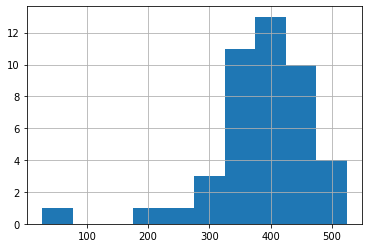

In [94]:
#we will use a Z test to check for normal distribution i.e. we check if our data is normally distributed
Blue_Cars_Weekend_Checked = Postal_Codes_Blue_Cars_Weekend['BlueCars_taken_sum'].sort_values(ascending =True)
Blue_Cars_Weekend_Checked.hist()
plt.set_title("Distribution Normality")



386    2
442    2
397    2
383    1
524    1
382    1
458    1
27     1
218    1
462    1
424    1
273    1
347    1
463    1
416    1
460    1
459    1
330    1
457    1
385    1
351    1
353    1
318    1
433    1
380    1
315    1
503    1
501    1
495    1
371    1
370    1
367    1
418    1
301    1
394    1
361    1
360    1
359    1
358    1
420    1
435    1
Name: BlueCars_taken_sum, dtype: int64


Text(0, 0.5, 'Frequency')

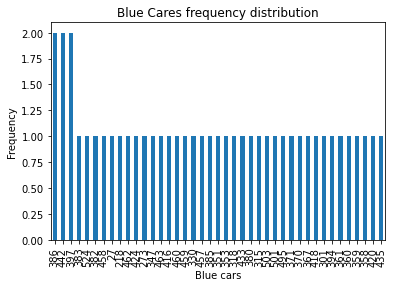

In [95]:
Blue_Cars_Weekend_Checked_Frequency = Blue_Cars_Weekend_Checked.value_counts(sort = True)
print(Blue_Cars_Weekend_Checked_Frequency)
plt=Blue_Cars_Weekend_Checked_Frequency.plot.bar()
plt.set_title("Blue Cares frequency distribution")
plt.set_xlabel("Blue cars")
plt.set_ylabel("Frequency")

In [96]:
#we now obtain the number of blue cars in our postal codes of interest during the weekday
Postal_Code_Cars_Mean = Postal_Codes_Blue_Cars_Weekend.groupby('Postal code')['BlueCars_taken_sum'].sum().sort_values(ascending = True)
Postal_Code_Cars_Mean

Postal code
75009    17081
Name: BlueCars_taken_sum, dtype: int64

In [97]:
#Stratified sampling

df2 = Postal_Codes_Blue_Cars_Weekend.groupby('Postal code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df2

# sample mean
sm= df2['BlueCars_taken_sum'].mean()
sm

# sample standard deviation
sd = df2['BlueCars_taken_sum'].std()
sd

#population mean
pm=df2['BlueCars_taken_sum'].mean()
pm

# calculating the z-score
zscore = (sm-pm) / sd
zscore

#calculating the p value
import scipy.stats as stats
from scipy.stats import norm
pvalue = stats.norm.cdf(zscore)
print(pvalue)

#interpretation of the p value
if pvalue < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

0.5
we fail to reject null hypothesis
